In [46]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import tsensor
%matplotlib inline


In [56]:
names="统一编号	X	Y	地面高程	井口高程	地下水类型	1990年1月	1990年2月	1990年3月	1990年4月	1990年5月	1990年6月	1990年7月	1990年8月	1990年9月	1990年10月	1990年11月	1990年12月	1991年1月	1991年2月	1991年3月	1991年4月	1991年5月	1991年6月	1991年7月	1991年8月	1991年9月	1991年10月	1991年11月	1991年12月	1992年1月	1992年2月	1992年3月	1992年4月	1992年5月	1992年6月	1992年7月	1992年8月	1992年9月	1992年10月	1992年11月	1992年12月	1993年1月	1993年2月	1993年3月	1993年4月	1993年5月	1993年6月	1993年7月	1993年8月	1993年9月	1993年10月	1993年11月	1993年12月	1994年1月	1994年2月	1994年3月	1994年4月	1994年5月	1994年6月	1994年7月	1994年8月	1994年9月	1994年10月	1994年11月	1994年12月	1995年1月	1995年2月	1995年3月	1995年4月	1995年5月	1995年6月	1995年7月	1995年8月	1995年9月	1995年10月	1995年11月	1995年12月	1996年1月	1996年2月	1996年3月	1996年4月	1996年5月	1996年6月	1996年7月	1996年8月	1996年9月	1996年10月	1996年11月	1996年12月	1997年1月	1997年2月	1997年3月	1997年4月	1997年5月	1997年6月	1997年7月	1997年8月	1997年9月	1997年10月	1997年11月	1997年12月	1998年1月	1998年2月	1998年3月	1998年4月	1998年5月	1998年6月	1998年7月	1998年8月	1998年9月	1998年10月	1998年11月	1998年12月	1999年1月	1999年2月	1999年3月	1999年4月	1999年5月	1999年6月	1999年7月	1999年8月	1999年9月	1999年10月	1999年11月	1999年12月	2000年1月	2000年2月	2000年3月	2000年4月	2000年5月	2000年6月	2000年7月	2000年8月	2000年9月	2000年10月	2000年11月	2000年12月	2001年1月	2001年2月	2001年3月	2001年4月	2001年5月	2001年6月	2001年7月	2001年8月	2001年9月	2001年10月	2001年11月	2001年12月	2002年1月	2002年2月	2002年3月	2002年4月	2002年5月	2002年6月	2002年7月	2002年8月	2002年9月	2002年10月	2002年11月	2002年12月	2003年1月	2003年2月	2003年3月	2003年4月	2003年5月	2003年6月	2003年7月	2003年8月	2003年9月	2003年10月	2003年11月	2003年12月	2004年1月	2004年2月	2004年3月	2004年4月	2004年5月	2004年6月	2004年7月	2004年8月	2004年9月	2004年10月	2004年11月	2004年12月	2005年1月	2005年2月	2005年3月	2005年4月	2005年5月	2005年6月	2005年7月	2005年8月	2005年9月	2005年10月	2005年11月	2005年12月	2006年1月	2006年2月	2006年3月	2006年4月	2006年5月	2006年6月	2006年7月	2006年8月	2006年9月	2006年10月	2006年11月	2006年12月	2007年1月	2007年2月	2007年3月	2007年4月	2007年5月	2007年6月	2007年7月	2007年8月	2007年9月	2007年10月	2007年11月	2007年12月	2008年1月	2008年2月	2008年3月	2008年4月	2008年5月	2008年6月	2008年7月	2008年8月	2008年9月	2008年10月	2008年11月	2008年12月	2009年1月	2009年2月	2009年3月	2009年4月	2009年5月	2009年6月	2009年7月	2009年8月	2009年9月	2009年10月	2009年11月	2009年12月	2010年1月	2010年2月	2010年3月	2010年4月	2010年5月	2010年6月	2010年7月	2010年8月	2010年9月	2010年10月	2010年11月	2010年12月	2011年1月	2011年2月	2011年3月	2011年4月	2011年5月	2011年6月	2011年7月	2011年8月	2011年9月	2011年10月	2011年11月	2011年12月	2012年1月	2012年2月	2012年3月	2012年4月	2012年5月	2012年6月	2012年7月	2012年8月	2012年9月	2012年10月	2012年11月	2012年12月	2013年1月	2013年2月	2013年3月	2013年4月	2013年5月	2013年6月	2013年7月	2013年8月	2013年9月	2013年10月	2013年11月	2013年12月	2014年1月	2014年2月	2014年3月	2014年4月	2014年5月	2014年6月	2014年7月	2014年8月	2014年9月	2014年10月	2014年11月	2014年12月	2015年1月	2015年2月	2015年3月	2015年4月	2015年5月	2015年6月	2015年7月	2015年8月	2015年9月	2015年10月	2015年11月	2015年12月	2016年1月	2016年2月	2016年3月	2016年4月	2016年5月	2016年6月	2016年7月	2016年8月	2016年9月	2016年10月	2016年11月	2016年12月	2017年1月	2017年2月	2017年3月	2017年4月	2017年5月	2017年6月	2017年7月	2017年8月	2017年9月	2017年10月	2017年11月	2017年12月	2018年1月	2018年2月	2018年3月	2018年4月	2018年5月	2018年6月	2018年7月	2018年8月	2018年9月	2018年10月	2018年11月	2018年12月"
col_names=names.split()
data=pd.read_excel('data.xlsx',names=col_names)

In [57]:
data=data.iloc[:,6:]

In [58]:
data=data.dropna(thresh=12*28).interpolate(axis=1)
data.fillna(method="ffill",axis=1)

,1990年1月,1990年2月,1990年3月,1990年4月,1990年5月,1990年6月,1990年7月,1990年8月,1990年9月,1990年10月,...,2018年3月,2018年4月,2018年5月,2018年6月,2018年7月,2018年8月,2018年9月,2018年10月,2018年11月,2018年12月
0,1095.59,1095.80,1093.78,1094.25,1094.65,1095.02,1095.42,1096.31,1096.03,1095.23,...,1102.19,1097.18,1094.63,1092.3500,1091.370,1091.5900,1091.76,1096.96,1098.15,1098.15
1,1103.76,1098.42,1098.06,1097.60,1098.91,1099.04,1100.09,1100.21,1100.07,1099.28,...,1102.91,1102.83,1102.92,1102.7400,1102.710,1103.0200,1103.38,1103.57,1103.45,1103.45
5,1107.13,1106.48,1106.23,1107.39,1107.13,1109.04,1107.26,1107.72,1107.97,1107.89,...,1112.29,1109.89,1109.29,1109.2800,1108.590,1103.3900,1106.56,1101.74,1102.69,1102.69
7,1119.58,1119.40,1119.40,1119.61,1119.76,1119.99,1119.85,1119.96,1119.94,1119.64,...,1119.27,1119.05,1119.08,1119.1500,1119.050,1119.4300,1119.95,1119.96,1119.95,1119.95
9,1122.31,1121.99,1121.99,1122.29,1122.43,1122.78,1122.87,1122.76,1122.63,1122.35,...,1121.07,1121.23,1121.37,1121.7700,1121.090,1121.4200,1121.62,1121.24,1121.30,1121.30
10,1122.09,1121.90,1121.89,1122.02,1121.94,1122.08,1122.11,1121.94,1121.78,1121.68,...,1121.00,1121.10,1121.50,1121.3800,1121.000,1120.8700,1121.10,1121.27,1121.30,1121.30
11,1106.69,1106.60,1106.53,1106.50,1106.44,1106.42,1106.39,1106.35,1106.51,1106.54,...,1102.05,1099.85,1098.63,1097.6500,1097.750,1097.4800,1098.45,1098.65,1098.86,1098.86
12,1090.34,1090.89,1090.02,1090.03,1089.84,1089.64,1088.93,1089.38,1091.03,1090.03,...,1098.74,1096.24,1095.64,1094.9400,1094.640,1094.5700,1096.54,1096.42,1097.04,1097.04
13,1098.18,1098.04,1097.37,1098.56,1097.65,1098.05,1097.81,1097.83,1098.77,1098.65,...,1099.63,1098.63,1097.83,1097.3300,1094.630,1094.7800,1096.26,1096.33,1096.23,1096.23
15,1105.86,1105.65,1105.49,1105.32,1105.23,1105.76,1105.81,1105.72,1105.86,1105.99,...,1102.17,1101.53,1100.67,1099.8700,1100.020,1100.0900,1100.83,1101.36,1101.47,1101.47


In [4]:
# 只要每个月地下水位高度数据
data=data.iloc[0:1,6:353]

In [5]:
data.head()

,1990年1月,1990年2月,1990年3月,1990年4月,1990年5月,1990年6月,1990年7月,1990年8月,1990年9月,1990年10月,...,2018年2月,2018年3月,2018年4月,2018年5月,2018年6月,2018年7月,2018年8月,2018年9月,2018年10月,2018年11月
0,1095.59,1095.8,1093.78,1094.25,1094.65,1095.02,1095.42,1096.31,1096.03,1095.23,...,1094.39,1102.19,1097.18,1094.63,1092.35,1091.37,1091.59,1091.76,1096.96,1098.15


In [6]:
# 行归一化
data_norm=data.sub(data.min(axis=1),axis=0).divide((data.max(axis=1)-data.min(axis=1)),axis=0)

In [7]:
m,n=data_norm.shape

In [8]:
# 整理成有监督数据集
data_x,data_y=[],[]
for i in range(m):
    for j in range(n):
        if j+13>n:
            break
        temp=data_norm.iloc[i,j:j+13]
        if temp.isna().sum()>0:
            continue
        data_x.append(temp[:-1].values)
        data_y.append(temp[-1])


In [9]:
# 数据集包含9202个样本
print(len(data_x))

322


In [10]:
# 划分数据集（训练集0.7，测试集0.3）
split_rate=0.7
train_len=int(len(data_x)*split_rate)
train_x,train_y=torch.tensor(data_x[:train_len],dtype=torch.float),\
                torch.tensor(data_y[:train_len],dtype=torch.float)
test_x,test_y=torch.tensor(data_x[train_len:],dtype=torch.float),\
              torch.tensor(data_y[train_len:],dtype=torch.float)

In [11]:
len(test_x)

97

In [72]:
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1],-1)
test_x=test_x.reshape(test_x.shape[0],test_x.shape[1],-1)
print(train_x.shape,test_x.shape)

torch.Size([225, 12, 1]) torch.Size([97, 12, 1])


In [167]:
# 定义网络模型
class LSTM(nn.Module):
    def __init__(self,input_size=1,hidden_size=16,num_layers=2,output_size=1):
        super(LSTM, self).__init__()
        self.lstm=nn.LSTM(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers)
        self.dropout=nn.Dropout(0.5)
        self.fc=nn.Linear(hidden_size,output_size)
    def forward(self,x):
        with tsensor.clarify():
            out,_=self.lstm(x)
            s,b,h=out.shape
            # print(out.shape)
            out=out.view(s*b,-1)
            out=self.dropout(out)
            out=self.fc(out)
        return out.view(s,b)


In [192]:
# 超参数
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lr = 0.01
batch_size = 1
num_epochs = 100

In [193]:
# 加载数据集
train_dataset=torch.utils.data.TensorDataset(train_x,train_y)
train_dataloader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size)
test_dataset=torch.utils.data.TensorDataset(test_x,test_y)
test_dataloader=torch.utils.data.DataLoader(test_dataset,batch_size=batch_size)

In [194]:
for X,y in train_dataloader:
    print(X.shape,y.shape)
    break

torch.Size([1, 12, 1]) torch.Size([1])


In [195]:
# 创建网络
net=LSTM().to(device)
# 损失函数 L2 Loss
criterion = nn.MSELoss()
# 优化器
optimizer = torch.optim.SGD(params=net.parameters(), lr=lr,momentum=0.9)

In [196]:
q=torch.tensor([1.,2.,3.])
q_hat=torch.tensor([[4,5,6],[4.,5.,6.]])
# q_hat=q_hat.unsqueeze(dim=2)
print(q.shape)
print(q_hat.shape)
criterion(q_hat.squeeze(),q)

torch.Size([3])
torch.Size([2, 3])


D:\Python\Python38\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([2, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(9.)

In [197]:
# 测试评估
def evaluate_test_loss(net,device):
    loss_sum = 0
    batch = 0
    net.eval()
    with torch.no_grad():
        for X, y in test_dataloader:
            X=X.reshape(X.shape[1],X.shape[0],-1)
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            loss_sum += (y_hat-y).abs().sum()
            batch += 1
        test_loss = loss_sum / (batch * batch_size)
    return test_loss

In [198]:
# 训练
def train(device):
    print('training on', device)
    for epoch in range(num_epochs + 1):
        train_l_sum, batch_count = 0.0, 0
        net.train()
        for X, y in train_dataloader:
            X=X.reshape(X.shape[1],X.shape[0],-1)
            X, y = X.to(device), y.to(device)
            # print(X.shape,y.shape)
            # print('y', y)
            y_hat = net(X)
            # print('y_hat', y_hat.shape)
            # print('y', y.shape)
            l = criterion(y_hat.squeeze(), y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()

            train_l_sum += l.item()
            batch_count += 1
        if epoch % 5 == 0:
            test_loss = 1
            print('epoch %d,train_loss %.4f,test_loss %.4f' % (epoch, train_l_sum / batch_count,test_loss))

In [199]:
train(device)

training on cuda
epoch 0,train_loss 0.0079,test_loss 1.0000
epoch 5,train_loss 0.0102,test_loss 1.0000
epoch 10,train_loss 0.0102,test_loss 1.0000
epoch 15,train_loss 0.0102,test_loss 1.0000
epoch 20,train_loss 0.0103,test_loss 1.0000
epoch 25,train_loss 0.0103,test_loss 1.0000
epoch 30,train_loss 0.0103,test_loss 1.0000
epoch 35,train_loss 0.0103,test_loss 1.0000
epoch 40,train_loss 0.0103,test_loss 1.0000
epoch 45,train_loss 0.0103,test_loss 1.0000
epoch 50,train_loss 0.0103,test_loss 1.0000
epoch 55,train_loss 0.0103,test_loss 1.0000
epoch 60,train_loss 0.0103,test_loss 1.0000
epoch 65,train_loss 0.0103,test_loss 1.0000
epoch 70,train_loss 0.0103,test_loss 1.0000
epoch 75,train_loss 0.0103,test_loss 1.0000
epoch 80,train_loss 0.0103,test_loss 1.0000
epoch 85,train_loss 0.0103,test_loss 1.0000
epoch 90,train_loss 0.0103,test_loss 1.0000
epoch 95,train_loss 0.0103,test_loss 1.0000
epoch 100,train_loss 0.0103,test_loss 1.0000


D:\Python\Python38\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([12])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [187]:
predict_res=[]
valid=data.iloc[0]
valid_data=data.iloc[0,:12]
# predict_res=valid_data.values.tolist()
# 归一化
norm_min=valid.min()
norm_max=valid.max()
valid_data=(valid_data-norm_min)/(norm_max-norm_min)
predict_res=valid_data.values.tolist()
valid_data_tensor=torch.tensor(valid_data.values,dtype=torch.float).to(device)
for _ in range(50-12):
    # print(valid_data_tensor)
    predict=net(valid_data_tensor.unsqueeze(1).unsqueeze(2)).sum()
    # 反归一化
    # predict_value=(predict*(norm_max-norm_min)+norm_min).item()
    predict_value=predict.item()
    predict_res.append(predict_value)
    valid_data_tensor=torch.cat((valid_data_tensor[1:],predict.squeeze().unsqueeze(dim=0)),dim=0)

print(predict_res)

[0.3967093235831715, 0.415904936014619, 0.23126142595977697, 0.2742230347349164, 0.3107861060329135, 0.3446069469835432, 0.3811700182815404, 0.46252285191955395, 0.43692870201096423, 0.36380255941499073, 0.3263254113345447, 0.37568555758682626, 4.706883430480957, 5.197386741638184, 5.398294925689697, 6.9037065505981445, 7.666369438171387, 8.811790466308594, 8.954126358032227, 10.393819808959961, 11.84153938293457, 12.567767143249512, 14.288421630859375, 14.117076873779297, 15.896319389343262, 16.060626983642578, 14.63040542602539, 13.795592308044434, 15.104358673095703, 14.532527923583984, 13.179469108581543, 13.622109413146973, 14.273534774780273, 14.001789093017578, 14.995460510253906, 14.211600303649902, 14.689910888671875, 15.046283721923828, 13.446325302124023, 15.045236587524414, 14.818958282470703, 15.353248596191406, 12.7340087890625, 13.768640518188477, 15.13640022277832, 14.720361709594727, 12.438197135925293, 12.902565002441406, 13.829598426818848, 15.624162673950195]


In [188]:
predict_res

[0.3967093235831715,
 0.415904936014619,
 0.23126142595977697,
 0.2742230347349164,
 0.3107861060329135,
 0.3446069469835432,
 0.3811700182815404,
 0.46252285191955395,
 0.43692870201096423,
 0.36380255941499073,
 0.3263254113345447,
 0.37568555758682626,
 4.706883430480957,
 5.197386741638184,
 5.398294925689697,
 6.9037065505981445,
 7.666369438171387,
 8.811790466308594,
 8.954126358032227,
 10.393819808959961,
 11.84153938293457,
 12.567767143249512,
 14.288421630859375,
 14.117076873779297,
 15.896319389343262,
 16.060626983642578,
 14.63040542602539,
 13.795592308044434,
 15.104358673095703,
 14.532527923583984,
 13.179469108581543,
 13.622109413146973,
 14.273534774780273,
 14.001789093017578,
 14.995460510253906,
 14.211600303649902,
 14.689910888671875,
 15.046283721923828,
 13.446325302124023,
 15.045236587524414,
 14.818958282470703,
 15.353248596191406,
 12.7340087890625,
 13.768640518188477,
 15.13640022277832,
 14.720361709594727,
 12.438197135925293,
 12.902565002441406,

[0.39670932 0.41590494 0.23126143 0.27422303 0.31078611 0.34460695
 0.38117002 0.46252285 0.4369287  0.36380256 0.32632541 0.37568556
 0.28153565 0.21480804 0.21206581 0.20292505 0.22303473 0.28610603
 0.32541133 0.36106033 0.35740402 0.34095064 0.20109689 0.32358318
 0.25959781 0.3464351  0.1809872  0.15813528 0.16087751 0.22120658
 0.28610603 0.31444241 0.30621572 0.35648995 0.3583181  0.40036563
 0.37202925 0.34552102 0.40767824 0.3308958  0.37294333 0.24588665
 0.34095064 0.35100548 0.36837294 0.50274223 0.36288848 0.3820841
 0.33180987 0.27605119 0.24314442 0.26508227 0.2714808  0.32723949
 0.37477148 0.32632541 0.39488117 0.42321755 0.23400366 0.32358318
 0.24588665 0.14533821 0.15813528 0.17184644 0.17550274 0.24497258
 0.2714808  0.36197441 0.4250457  0.36837294 0.34095064 0.35374771
 0.27696527 0.22303473 0.18738574 0.19469835 0.26965265 0.35557587
 0.40585009 0.33546618 0.34552102 0.34826325 0.21755027 0.26325411
 0.28702011 0.19561243 0.1809872  0.08500914 0.06489945 0.14533

D:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)


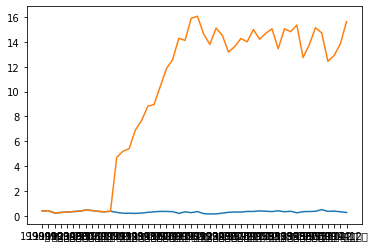

In [191]:
print(((valid-norm_min)/(norm_max-norm_min)).values)
plt.plot(((valid-norm_min)/(norm_max-norm_min))[:50])
plt.plot(predict_res)